In [53]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn.feature_extraction.text import CountVectorizer

# Lectura de datos

Se leen los datos y se eliminan las stop words 

In [54]:
dt = pd.read_csv('comentarios_encuesta.csv',encoding='unicode_escape')
corpus = list(dt['text'])

vectorizer = CountVectorizer(stop_words=["a","de","un","la","mas","estan","tener","hacer"]) #cuenta la frecuencia de ocurrencia de cada término en cada documento
X = vectorizer.fit_transform(corpus) 

In [55]:
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))

['abastecimiento' 'abierta' 'abiertos' ... 'wifi' 'zona' 'zonas']
2691


# Tabla de frecuencia 

In [56]:
df = pd.DataFrame(X.toarray())
df.columns = vectorizer.get_feature_names_out()
df_bool = df.astype('bool')
df_bool

,abastecimiento,abierta,abiertos,abran,abren,abriera,abrir,abstracta,aburridas,aburrir,...,volver,volvera,volvieran,voy,voz,vuelvan,web,wifi,zona,zonas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1474,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1475,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1476,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Graficaion de de frecuencia de las palabras

<AxesSubplot: >

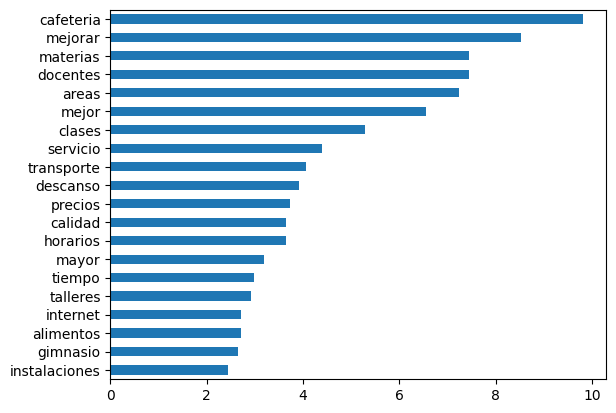

In [57]:
item_freq = df_bool.sum(axis=0)/len(df)*100
item_freq.sort_values()[-20:].plot.barh() 

In [58]:
frequent_itemsets = apriori(df_bool, min_support=0.005, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.005413,(abrir)
1,0.006766,(academica)
2,0.007442,(accesibles)
3,0.006089,(acceso)
4,0.006766,(acerca)
...,...,...
291,0.010825,"(alimentos, cafeteria, calidad)"
292,0.006766,"(alimentos, precios, cafeteria)"
293,0.005413,"(precios, bajar, cafeteria)"
294,0.005413,"(cafeteria, precios, calidad)"


<AxesSubplot: >

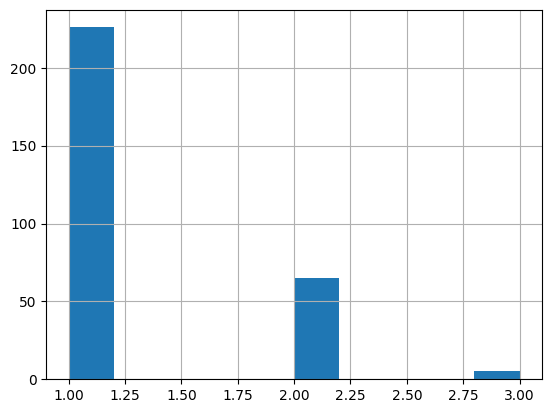

In [59]:
frequent_itemsets["n_items"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))
frequent_itemsets["n_items"].hist()

In [60]:
from mlxtend.frequent_patterns import association_rules

In [61]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alimentos),(cafeteria),0.027064,0.098106,0.020974,0.775000,7.899655,0.018319,4.008420
1,(comunes),(areas),0.006766,0.072395,0.006766,1.000000,13.813084,0.006276,inf
2,(descanso),(areas),0.039242,0.072395,0.021651,0.551724,7.621012,0.018810,2.069272
3,(recreativas),(areas),0.006089,0.072395,0.005413,0.888889,12.278297,0.004972,8.348444
4,(bajar),(cafeteria),0.007442,0.098106,0.005413,0.727273,7.413166,0.004683,3.306946
5,(bajar),(precios),0.007442,0.037212,0.006089,0.818182,21.986777,0.005812,5.295332
6,(limpieza),(banos),0.013532,0.020974,0.010149,0.750000,35.758065,0.009865,3.916103
7,(menu),(cafeteria),0.005413,0.098106,0.005413,1.000000,10.193103,0.004882,inf
8,(precios),(cafeteria),0.037212,0.098106,0.031123,0.836364,8.525141,0.027472,5.511577
9,(productos),(cafeteria),0.006089,0.098106,0.005413,0.888889,9.060536,0.004815,8.117050


# Vizualisacion de las reglas de asociación a traves de un grafo

https://github.com/lispsil/python-arulesviz


In [62]:
pip install arulesviz

Note: you may need to restart the kernel to use updated packages.


In [63]:
from arulesviz import Arulesviz

In [64]:
from google.colab import output
output.enable_custom_widget_manager()

In [65]:
g = Arulesviz(frequent_itemsets['itemsets'], 0.001, 0.3, 15, products_to_drop=[])
g.create_rules()
g.plot_graph(width=1800, directed=False, charge=-150, link_distance=20)

c:\Users\cyair\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(FloatSlider).__init__(base=10).
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
c:\Users\cyair\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(FloatSlider).__init__(base=10).
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
c:\Users\cyair\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(FloatSlider).__init__(base=10).
objec